<a href="https://colab.research.google.com/github/Vidi005/COVID-19-Prediction/blob/master/Covid_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
!apt-get install subversion > /dev/null

!svn export https://github.com/Vidi005/COVID-19-Prediction/trunk/datasets > /dev/null

In [0]:
df = pd.read_csv('datasets/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_date = df.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [0]:
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]

for index, row in date_confirmed.iterrows():
  if row['Confirmed'] is None:
    row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
  if row['Deaths'] is None:
    row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
  if row['Recovered'] is None:
    row['Recovered'] = 0.0

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(date_confirmed["Confirmed"][:30],date_confirmed["Confirmed"][:30],epochs=20,)
prediction_cofirmed = model.predict(date_confirmed["Confirmed"])
final_prediction_confirmed = []
for i in range(0,len(prediction_cofirmed)):
  final_prediction_confirmed.append        (prediction_cofirmed[i]*date_confirmed["Confirmed"][i])

Epoch 1/20
30/30 [==============================] - 0s 144us/step - loss: -501786.3750 - accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 0s 88us/step - loss: -501786.4062 - accuracy: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 0s 107us/step - loss: -501786.4062 - accuracy: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 0s 85us/step - loss: -501786.3438 - accuracy: 0.0000e+00
Epoch 5/20
30/30 [==============================] - 0s 74us/step - loss: -501786.3438 - accuracy: 0.0000e+00
Epoch 6/20
30/30 [==============================] - 0s 103us/step - loss: -501786.3750 - accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 0s 92us/step - loss: -501786.3750 - accuracy: 0.0000e+00
Epoch 8/20
30/30 [==============================] - 0s 89us/step - loss: -501786.3438 - accuracy: 0.0000e+00
Epoch 9/20
30/30 [==============================] - 0s 108us/step - loss: -501786.3750 - accuracy: 0.0000e+00
Epoch 10/20
30/

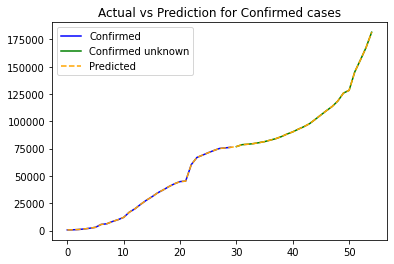

In [16]:
plt.title("Actual vs Prediction for Confirmed cases")
plt.plot(date_confirmed['Confirmed'][:30], label='Confirmed', color='blue')
plt.plot(date_confirmed['Confirmed'][30:], label='Confirmed unknown', color='green')
plt.plot(final_prediction_confirmed, label='Predicted', linestyle='dashed', color='orange')
plt.legend()
plt.show()